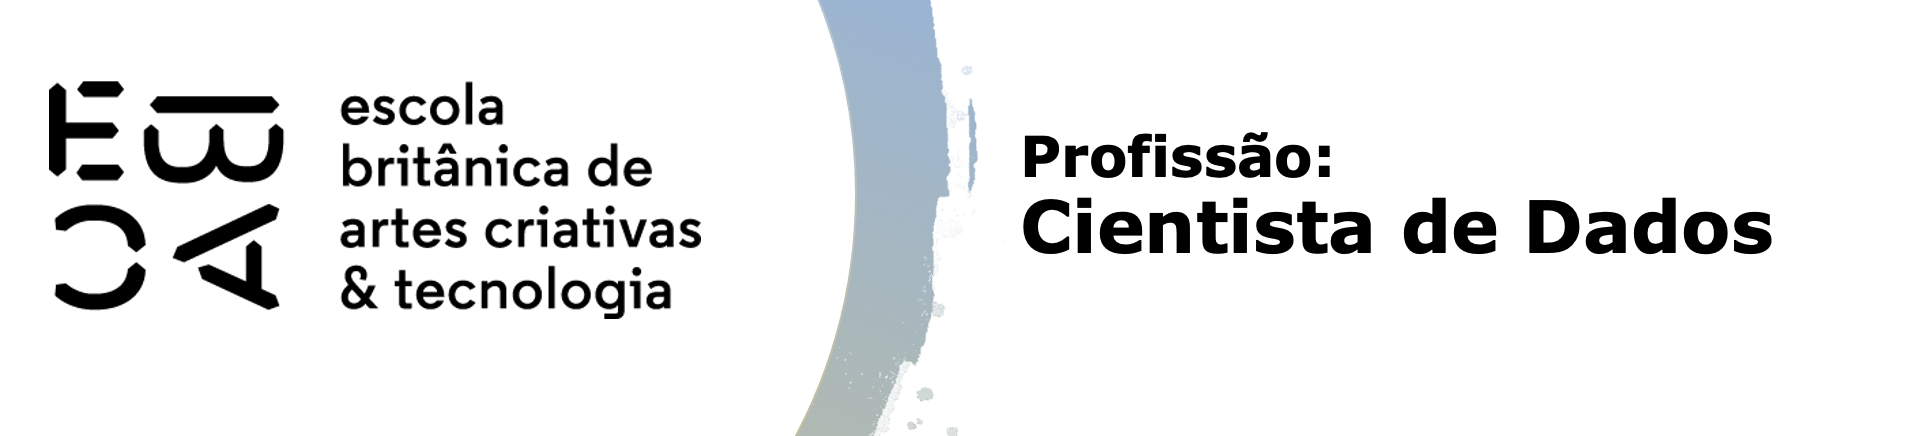
# Módulo 23 - Combinação de Modelos I

# Tarefa 01

Esta tarefa consiste em explicar a técnica de ensemble chamada Bagging. Ela será divida em três partes, sendo que na primeira há um passo-a-passo dela; na segunda parte há uma breve explicação desta técnica; enquanto que na terceira é visualizada uma demonstração dela por meio da linguagem python.

### 1. Monte um passo a passo para o Bagging

O passo-a-passo pode ser divido em três partes, sendo elas:

#### 1.1 _Bootstrap_

O dataframe na qual se deseja realizar a predição de dados é carregado e submetido à amostragem por reposição (conhecida por _bootstrap_), na qual são gerados diferentes dataframes com linhas aleatórias e repetidas do original. O número de dataframes criados é definido pelo usuário.

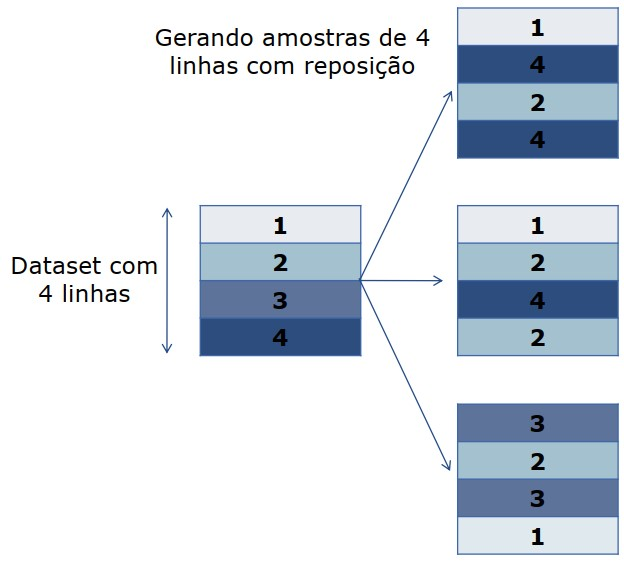

#### 1.2 _Base Learners_

Também chamada de treinamento simultâneo. Nesta etapa, cada um dos novos dataframes é submetido independentemente a uma mesma modelagem, com esta podendo ser árvores, regressões, entre outros tipos. Os modelos são guardados em um conjunto (chamado de _Base Learners_).

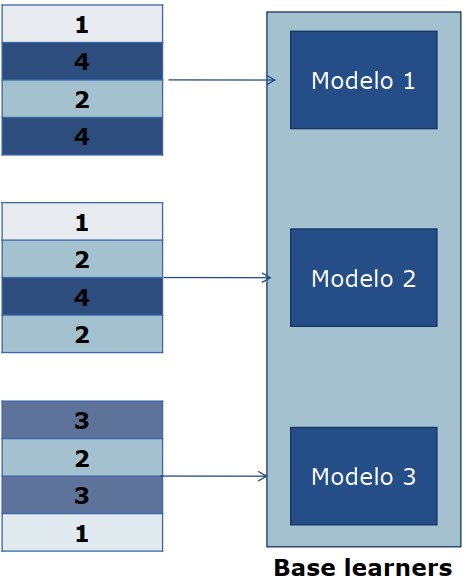

#### 1.3 _Aggregating_

Uma vez que os modelos estão prontos, é submetida a eles uma mesma linha de teste. Os valores de teste são coletados e a partir deles é obtido um valor resultante através de um método de agregação (ou _Aggregating_). O método varia de acordo com o tipo de dado analisado. Se for uma predição de classificação, são contadas as frequências das classes obtidas em cada modelo, e aquela com maior contagem é definida como a classe resultante (método conhecido por _Majority Vote_). Por outro lado, se os dados numéricos (ou seja, uma regressão), o valor final será a média dos obtidos nos modelos.

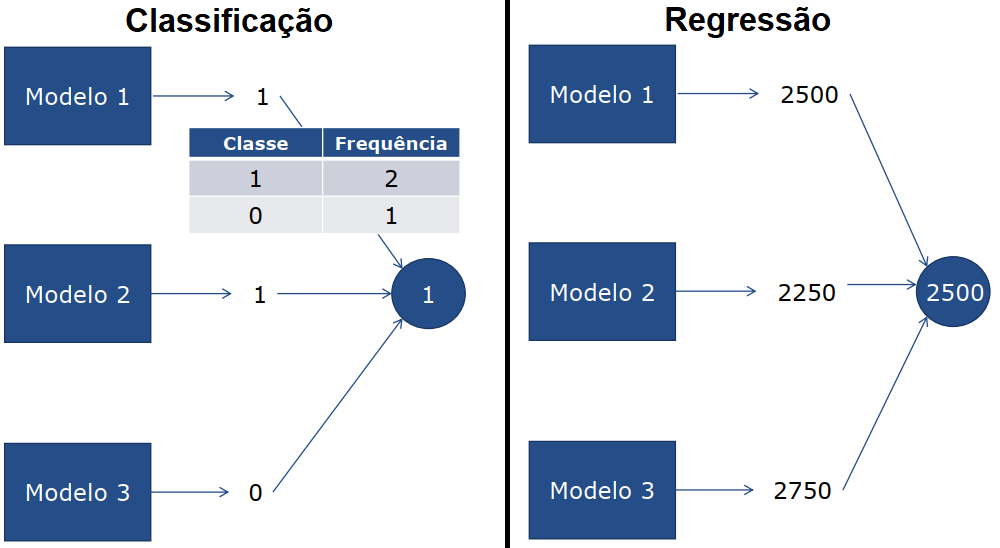

### 2. Explique com suas palavras o Bagging

_Bagging_ ou _Bootstrap Aggregating_ é uma técnica de predição na qual se utilizam modelos sobre diversos conjuntos de dados que são derivados de um dataframe inicial. _Bootstrap_ é nome dado ao processo de criação dos dataframes, sendo desenvolvidos por meio da amostragem por reposição, na qual são selecionadas linhas aleatórias do conjunto de dados original. Tais linhas podem ser repetidas, umas vez que não são removidas do dataframe após serem selecinadas. O termo _Aggregating_ é utilizado devido à combinação dos resultados obtidos pelass modelagens dos dados de cada dataframe criado, com esta agregação entregando o valor final da predição. 

Esta técnica é utilizada para reduzir o risco de overfitting e erros na predição de dados do dataframe. Tendo como filtro o _Majority Vote_ (ou Voto da Maioria), que é a contagem da frequência de cada classe resultante de cada modelagem no caso de classificação de dados; ou a média dos resultados das modelagens, no caso dos valores serem numéricos. 

### 3. (Opcional) Implementar em python o código do Bagging

– Bootstrap

– Modelagem

– Agregação

#### 3.1 Pacotes necessários
Os pacotes utilizados nesta tarefa são:
- os, para a criação de pastas para salvar os modelos;
- pandas, para leitura e interação com os dados;
- sklearns.datasets, na qual vão ser usados os comandos load_wine (dataset classification) e load_diabetes (dataset regression);
- sklearn.model_selection, com o comando train_test_split, para dividir cada dataframe em treino e teste;
- sklearn.tree para aplicar os modelos DecisionTreeClassifier e DecisionTreeRegressor nos dataframes;
- sklearn.metrics, com os comandos accuracy_socre e r2_score, para avaliar os ajustes das árvores nos dataframes.

In [78]:
import os

import pandas as pd

from sklearn.datasets import load_wine
from sklearn.datasets import load_diabetes

from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score

#### 3.2 Função Bagging em Classifiers

Para o caso dos dados analisados serem do tipo classifier, vamos definir uma função que aplique a técnica bagging sobre eles. O nome da função será bagging_classifier. Nesta função, será criada uma _Base Learners_ cujo comprimento é definido pelo parâmetro _n_. Será aplicado o modelo de árvores de decisão em cada conjunto desta base.

In [79]:
def bagging_classifier(df: pd.DataFrame, n: int=3,
                       base_teste: float=0.3) -> pd.DataFrame:
    '''
    Função para predizer as classes de um dataframe a partir da técnica 
    de ensemble Bagging. Para isso, ela recebe 3 parâmetros:
    
    df -> dataframe que se quer analisar, a variável resposta deve ser do 
    tipo classifier;
    
    n -> número de amostras criadas por bootstrap (amostragem por reposição)
    do df. Cada uma delas é salva no formato csv em uma pasta criada nessa função.
    O valor default é de 3 amostras.
    
    base_teste -> Porcentagem do df que será usada como teste. O restante é usada 
    como treinamento. O valor default é de 30%.
    
    Em cada amostra criada, é aplicado o modelo de DecisionTreeClassifier, salvando
    os valores preditos do target em um dicionário.
    
    No fim, é retornado a tabela desenvolvida com os valores originais do target
    e os preditos pelas árvores de classificação aplicadas em cada amostra de 
    bootstrap, além da acurácia do ajuste final.
    '''
    
    # Divisão do dataframe em treino e teste
    treino, teste = train_test_split(df, test_size=base_teste)
    
    X_teste = teste.drop(['target'], axis=1)
    y_teste = teste['target'].rename('y_teste')
    
    # Dicionário para guardar os valores preditos pelos modelos no bagging
    y_bagging = {}
    
    # Número de linhas na base de treino
    len_treino = len(treino)
    
    # Verifica se há uma pasta para salvar os modelos, se não, cria uma
    if not os.path.exists('./Classifier Models'):
        os.mkdir('./Classifier Models')
    
    # Looping para gerar as amostras por bootstrap e modelá-las.
    for i in range(n):
        
        # Bootstrap
        treino_i = treino.sample(n=len_treino, replace=True)
        
        # Nome do arquivo csv com a amostra de bootstrap, salvando-a na pasta criada
        nome = './Classifier Models/modelo_' + str(i) + '.csv'
        
        # Salva a amostra de bootstrap em csv
        treino_i.to_csv(nome)
        
        X_treino = treino_i.drop(['target'], axis=1)
        y_treino = treino_i['target']
        
        # Modelagem - Base Learners
        modelo = DecisionTreeClassifier(random_state=42)
        modelo.fit(X_treino, y_treino)
        
        # Salva as predições do fit no dicionário para a etapa Aggregating
        y_bagging.update({i: modelo.predict(X_teste)})
        
    # Aggregating, agregando o valor mais frequente de cada predição
    y_pred = pd.DataFrame(y_bagging).mode(axis=1).rename(columns={0: 'y_pred'})
    
    
    # Cálculo da acurácia do ajuste
    acuracia = accuracy_score(y_true=y_teste, y_pred=y_pred['y_pred'])
    
    # Resultados
    print('Modelo: Árvore de Decisão')
    print(f'Acurácia do ajuste: {acuracia:.2f}')
    
    # Tabela com a comparação dos valores verdadeiros com os preditos de y
    tb_final = pd.concat(objs=[y_teste.reset_index(drop=True),
                               y_pred['y_pred']], axis=1)
    
    # Retorna a tabela com os dados verdadeiros e preditos
    return tb_final

Para demonstrar a função criada, vamos aplicá-la sobre o dataset load_wine do sklearn e medir a acurácia do ajuste.

In [80]:
# Salva os variáveis explicativas do dataset load_wine() em um dataframe
df = pd.DataFrame(load_wine().data, columns=load_wine().feature_names)

# Adiciona uma coluna ao dataframe, contendo os valores da variável resposta
df['target'] = load_wine().target

# Submete o df à função desenvolvida, criando 7 amostras bootstraps
df_final = bagging_classifier(df=df, n=7, base_teste=0.3)

# Mostra as 5 primeiras linhas da tabela comparativa dos y
df_final.head()

Modelo: Árvore de Decisão
Acurácia do ajuste: 0.87


,y_teste,y_pred
0,2,2.0
1,1,1.0
2,0,0.0
3,2,2.0
4,1,1.0


#### 3.2 Função Bagging em Regression

Para o caso dos dados analisados serem do tipo regression, vamos definir uma função que aplique a técnica bagging sobre eles. O nome da função será bagging_regression. Nesta função, será criada uma _Base Learners_ cujo comprimento é definido pelo parâmetro _n_. Será aplicado o modelo de árvores de regressão em cada conjunto desta base.

In [81]:
def bagging_regressor(df: pd.DataFrame, n: int=3,
                       base_teste: float=0.3) -> pd.DataFrame:
    '''
    Função para predizer as classes de um dataframe a partir da técnica 
    de ensemble Bagging. Para isso, ela recebe 3 parâmetros:
    
    df -> dataframe que se quer analisar, a variável resposta deve ser do 
    tipo regression;
    
    n -> número de amostras criadas por bootstrap (amostragem por reposição)
    do df. Cada uma delas é salva no formato csv em uma pasta criada nessa função.
    O valor default é de 3 amostras.
    
    base_teste -> Porcentagem do df que será usada como teste. O restante é usada 
    como treinamento. O valor default é de 30%.
    
    Em cada amostra criada, é aplicado o modelo de DecisionTreeRegressor, salvando
    os valores preditos do target em um dicionário.
    
    No fim, é retornado a tabela desenvolvida com os valores originais do target
    e os preditos pelas árvores de regressão aplicadas em cada amostra de 
    bootstrap, além do r-quadrado do ajuste final.
    '''
    
    # Divisão do dataframe em treino e teste
    treino, teste = train_test_split(df, test_size=base_teste)
    
    X_teste = teste.drop(['target'], axis=1)
    y_teste = teste['target'].rename('y_teste')
    
    # Dicionário para guardar os valores preditos pelos modelos no bagging
    y_bagging = {}
    
    # Número de linhas na base de treino
    len_treino = len(treino)
    
    # Verifica se há uma pasta para salvar os modelos, se não, cria uma
    if not os.path.exists('./Regressor Models'):
        os.mkdir('./Regressor Models')
    
    # Looping para gerar as amostras por bootstrap e modelá-las.
    for i in range(n):
        
        # Bootstrap
        treino_i = treino.sample(n=len_treino, replace=True)
        
        # Nome do arquivo csv com a amostra de bootstrap, salvando-a na pasta criada
        nome = './Regressor Models/modelo_' + str(i) + '.csv'
        
        # Salva a amostra de bootstrap em csv
        treino_i.to_csv(nome)
        
        X_treino = treino_i.drop(['target'], axis=1)
        y_treino = treino_i['target']
        
        # Modelagem - Base Learners
        modelo = DecisionTreeRegressor(random_state=42)
        modelo.fit(X_treino, y_treino)
        
        # Salva as predições do fit no dicionário para a etapa Aggregating
        y_bagging.update({i: modelo.predict(X_teste)})
        
    # Aggregating, agregando o valor médio de cada predição
    y_pred = pd.DataFrame(y_bagging).mean(axis=1).rename('y_pred')
    
    
    # Cálculo do r-quadrado do ajuste
    r2 = r2_score(y_true=y_teste, y_pred=y_pred)
    
    # Resultados
    print('Modelo: Árvore de Regressão')
    print(f'R-quadrado do ajuste: {r2:.2f}')
    
    # Tabela com a comparação dos valores verdadeiros com os preditos de y
    tb_final = pd.concat(objs=[y_teste.reset_index(drop=True),
                               y_pred], axis=1)
    
    # Retorna a tabela com os dados verdadeiros e preditos
    return tb_final

Para demonstrar a função criada, vamos aplicá-la sobre o dataset load_diabetes do sklearn e medir o R-quadrado do ajuste.

In [82]:
# Salva os variáveis explicativas do dataset load_wine() em um dataframe
df = pd.DataFrame(load_diabetes().data, columns=load_diabetes().feature_names)

# Adiciona uma coluna ao dataframe, contendo os valores da variável resposta
df['target'] = load_diabetes().target

# Submete o df à função desenvolvida, criando 7 amostras bootstraps
df_final = bagging_regressor(df=df, n=7, base_teste=0.3)

# Mostra as 5 primeiras linhas da tabela comparativa dos y
df_final.head()

Modelo: Árvore de Regressão
R-quadrado do ajuste: 0.38


,y_teste,y_pred
0,113.0,105.857143
1,75.0,80.857143
2,167.0,152.428571
3,102.0,149.285714
4,189.0,150.285714
